In [1]:
resized_images_100_100_train_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Train'
resized_images_100_100_test_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test'
resized_images_100_100_validation_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Validation'

In [2]:
import numpy as np
import keras
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import regularizers
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.callbacks import ModelCheckpoint

indusNetModel=models.Sequential()

indusNetModel.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(100, 100, 3)))
indusNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(256, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(256, (3, 3), activation='relu'))
indusNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
indusNetModel.add(layers.Dropout(0.2))

indusNetModel.add(layers.Conv2D(256, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(256, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(512, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(512, (3, 3), activation='relu'))
indusNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
indusNetModel.add(layers.Dropout(0.2))

indusNetModel.add(layers.Conv2D(512, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(1024, (3, 3), activation='relu'))
indusNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
indusNetModel.add(layers.Dropout(0.2))

indusNetModel.add(layers.Flatten())
indusNetModel.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
indusNetModel.add(layers.Dropout(0.2))
indusNetModel.add(layers.Dense(7, activation='softmax'))

indusNetModel.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['categorical_accuracy'])
indusNetModel.summary()

filepath="IndusNet_7_classes_100_100_1st Experiment.h5"
checkpoint = ModelCheckpoint(filepath, save_best_only=True)
callbacks_list = [checkpoint]

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 128)       3584      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 128)       147584    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 94, 94, 256)       295168    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 92, 92, 256)       590080    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 46, 46, 256)       0         
_________________________________________________________________
dropout (Dropout)    

In [3]:
batch_size=16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation  and test data should not be augmented!
validation_datagen=ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        resized_images_100_100_train_dir,
        target_size=(100, 100),
        batch_size=batch_size)

validation_generator = validation_datagen.flow_from_directory(
        resized_images_100_100_validation_dir,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

test_generator = test_datagen.flow_from_directory(
        resized_images_100_100_test_dir,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

Found 2800 images belonging to 7 classes.
Found 280 images belonging to 7 classes.
Found 560 images belonging to 7 classes.


In [4]:
number_of_training_samples=2800
number_of_validation_samples=280
number_of_test_samples=560

In [5]:
import math

history = indusNetModel.fit_generator(
      train_generator,
      steps_per_epoch=math.ceil(number_of_training_samples//batch_size),
      epochs=400,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=math.ceil(number_of_validation_samples//batch_size))

Instructions for updating:
Use tf.cast instead.
Epoch 1/400
175/175 [==============================] - 100s 570ms/step - loss: 1.9152 - categorical_accuracy: 0.1946 - val_loss: 1.7376 - val_categorical_accuracy: 0.2714
Epoch 2/400
175/175 [==============================] - 90s 517ms/step - loss: 1.7647 - categorical_accuracy: 0.2604 - val_loss: 1.6725 - val_categorical_accuracy: 0.3071
Epoch 3/400
175/175 [==============================] - 91s 520ms/step - loss: 1.7194 - categorical_accuracy: 0.2804 - val_loss: 1.6420 - val_categorical_accuracy: 0.3000
Epoch 4/400
175/175 [==============================] - 90s 516ms/step - loss: 1.6742 - categorical_accuracy: 0.2911 - val_loss: 1.6066 - val_categorical_accuracy: 0.2964
Epoch 5/400
175/175 [==============================] - 91s 517ms/step - loss: 1.6376 - categorical_accuracy: 0.3029 - val_loss: 1.5353 - val_categorical_accuracy: 0.3393
Epoch 6/400
175/175 [==============================] - 90s 517ms/step - loss: 1.6143 - categorical_ac

175/175 [==============================] - 90s 513ms/step - loss: 0.9159 - categorical_accuracy: 0.6496 - val_loss: 0.7578 - val_categorical_accuracy: 0.6964
Epoch 31/400
175/175 [==============================] - 89s 511ms/step - loss: 0.9202 - categorical_accuracy: 0.6382 - val_loss: 0.7796 - val_categorical_accuracy: 0.7107
Epoch 32/400
175/175 [==============================] - 91s 518ms/step - loss: 0.8998 - categorical_accuracy: 0.6536 - val_loss: 0.7572 - val_categorical_accuracy: 0.7214
Epoch 33/400
175/175 [==============================] - 91s 517ms/step - loss: 0.8534 - categorical_accuracy: 0.6668 - val_loss: 0.7414 - val_categorical_accuracy: 0.6821
Epoch 34/400
175/175 [==============================] - 89s 511ms/step - loss: 0.8679 - categorical_accuracy: 0.6729 - val_loss: 0.7525 - val_categorical_accuracy: 0.7286
Epoch 35/400
175/175 [==============================] - 89s 511ms/step - loss: 0.8165 - categorical_accuracy: 0.6907 - val_loss: 0.8017 - val_categorical_accu

175/175 [==============================] - 90s 512ms/step - loss: 0.5701 - categorical_accuracy: 0.8004 - val_loss: 0.6059 - val_categorical_accuracy: 0.8000
Epoch 61/400
175/175 [==============================] - 90s 512ms/step - loss: 0.5594 - categorical_accuracy: 0.8086 - val_loss: 0.5943 - val_categorical_accuracy: 0.7750
Epoch 62/400
175/175 [==============================] - 90s 512ms/step - loss: 0.5694 - categorical_accuracy: 0.7989 - val_loss: 0.5849 - val_categorical_accuracy: 0.7964
Epoch 63/400
175/175 [==============================] - 90s 512ms/step - loss: 0.5386 - categorical_accuracy: 0.8204 - val_loss: 0.6889 - val_categorical_accuracy: 0.7429
Epoch 64/400
175/175 [==============================] - 90s 512ms/step - loss: 0.5359 - categorical_accuracy: 0.8179 - val_loss: 0.6733 - val_categorical_accuracy: 0.7929
Epoch 65/400
175/175 [==============================] - 90s 516ms/step - loss: 0.5147 - categorical_accuracy: 0.8236 - val_loss: 0.5029 - val_categorical_accu

175/175 [==============================] - 90s 515ms/step - loss: 0.3973 - categorical_accuracy: 0.8696 - val_loss: 0.4345 - val_categorical_accuracy: 0.8714
Epoch 91/400
175/175 [==============================] - 90s 513ms/step - loss: 0.3670 - categorical_accuracy: 0.8861 - val_loss: 0.4556 - val_categorical_accuracy: 0.8571
Epoch 92/400
175/175 [==============================] - 90s 512ms/step - loss: 0.3747 - categorical_accuracy: 0.8854 - val_loss: 0.6158 - val_categorical_accuracy: 0.8214
Epoch 93/400
175/175 [==============================] - 90s 512ms/step - loss: 0.4249 - categorical_accuracy: 0.8789 - val_loss: 0.5445 - val_categorical_accuracy: 0.8500
Epoch 94/400
175/175 [==============================] - 90s 512ms/step - loss: 0.3832 - categorical_accuracy: 0.8743 - val_loss: 0.5048 - val_categorical_accuracy: 0.8536
Epoch 95/400
175/175 [==============================] - 90s 512ms/step - loss: 0.3789 - categorical_accuracy: 0.8836 - val_loss: 0.5337 - val_categorical_accu

175/175 [==============================] - 90s 516ms/step - loss: 0.2879 - categorical_accuracy: 0.9104 - val_loss: 0.3955 - val_categorical_accuracy: 0.8964
Epoch 121/400
175/175 [==============================] - 89s 511ms/step - loss: 0.2993 - categorical_accuracy: 0.9093 - val_loss: 0.4677 - val_categorical_accuracy: 0.8750
Epoch 122/400
175/175 [==============================] - 90s 512ms/step - loss: 0.2741 - categorical_accuracy: 0.9154 - val_loss: 0.4132 - val_categorical_accuracy: 0.8750
Epoch 123/400
175/175 [==============================] - 90s 512ms/step - loss: 0.2738 - categorical_accuracy: 0.9193 - val_loss: 0.4534 - val_categorical_accuracy: 0.8929
Epoch 124/400
175/175 [==============================] - 90s 512ms/step - loss: 0.2552 - categorical_accuracy: 0.9257 - val_loss: 0.5079 - val_categorical_accuracy: 0.8643
Epoch 125/400
175/175 [==============================] - 90s 516ms/step - loss: 0.2521 - categorical_accuracy: 0.9229 - val_loss: 0.3678 - val_categorical

175/175 [==============================] - 90s 512ms/step - loss: 0.2480 - categorical_accuracy: 0.9254 - val_loss: 0.3953 - val_categorical_accuracy: 0.8964
Epoch 151/400
175/175 [==============================] - 90s 512ms/step - loss: 0.2195 - categorical_accuracy: 0.9339 - val_loss: 0.5049 - val_categorical_accuracy: 0.8964
Epoch 152/400
175/175 [==============================] - 90s 512ms/step - loss: 0.2098 - categorical_accuracy: 0.9339 - val_loss: 0.4168 - val_categorical_accuracy: 0.9071
Epoch 153/400
175/175 [==============================] - 90s 512ms/step - loss: 0.2060 - categorical_accuracy: 0.9425 - val_loss: 0.4099 - val_categorical_accuracy: 0.9179
Epoch 154/400
175/175 [==============================] - 90s 512ms/step - loss: 0.2335 - categorical_accuracy: 0.9257 - val_loss: 0.5362 - val_categorical_accuracy: 0.8643
Epoch 155/400
175/175 [==============================] - 90s 512ms/step - loss: 0.2290 - categorical_accuracy: 0.9318 - val_loss: 0.4827 - val_categorical

175/175 [==============================] - 90s 512ms/step - loss: 0.1803 - categorical_accuracy: 0.9443 - val_loss: 0.5120 - val_categorical_accuracy: 0.8964
Epoch 181/400
175/175 [==============================] - 90s 512ms/step - loss: 0.1793 - categorical_accuracy: 0.9454 - val_loss: 0.5752 - val_categorical_accuracy: 0.8964
Epoch 182/400
175/175 [==============================] - 90s 512ms/step - loss: 0.1863 - categorical_accuracy: 0.9504 - val_loss: 0.4468 - val_categorical_accuracy: 0.9036
Epoch 183/400
175/175 [==============================] - 90s 512ms/step - loss: 0.2036 - categorical_accuracy: 0.9446 - val_loss: 0.4215 - val_categorical_accuracy: 0.9000
Epoch 184/400
175/175 [==============================] - 90s 512ms/step - loss: 0.1905 - categorical_accuracy: 0.9446 - val_loss: 0.3726 - val_categorical_accuracy: 0.9214
Epoch 185/400
175/175 [==============================] - 90s 512ms/step - loss: 0.1578 - categorical_accuracy: 0.9543 - val_loss: 0.4827 - val_categorical

175/175 [==============================] - 90s 512ms/step - loss: 0.1661 - categorical_accuracy: 0.9543 - val_loss: 0.4408 - val_categorical_accuracy: 0.9250
Epoch 211/400
175/175 [==============================] - 90s 511ms/step - loss: 0.1437 - categorical_accuracy: 0.9621 - val_loss: 0.5762 - val_categorical_accuracy: 0.8750
Epoch 212/400
175/175 [==============================] - 90s 512ms/step - loss: 0.1585 - categorical_accuracy: 0.9586 - val_loss: 0.5657 - val_categorical_accuracy: 0.8857
Epoch 213/400
175/175 [==============================] - 90s 512ms/step - loss: 0.1465 - categorical_accuracy: 0.9629 - val_loss: 0.4368 - val_categorical_accuracy: 0.9071
Epoch 214/400
175/175 [==============================] - 90s 512ms/step - loss: 0.1634 - categorical_accuracy: 0.9568 - val_loss: 0.4645 - val_categorical_accuracy: 0.8679
Epoch 215/400
175/175 [==============================] - 90s 512ms/step - loss: 0.1437 - categorical_accuracy: 0.9579 - val_loss: 0.4149 - val_categorical

175/175 [==============================] - 90s 517ms/step - loss: 0.1464 - categorical_accuracy: 0.9600 - val_loss: 0.4686 - val_categorical_accuracy: 0.9321
Epoch 241/400
175/175 [==============================] - 90s 515ms/step - loss: 0.1649 - categorical_accuracy: 0.9518 - val_loss: 0.3647 - val_categorical_accuracy: 0.9321
Epoch 242/400
175/175 [==============================] - 90s 514ms/step - loss: 0.1415 - categorical_accuracy: 0.9636 - val_loss: 0.3670 - val_categorical_accuracy: 0.8786
Epoch 243/400
175/175 [==============================] - 90s 515ms/step - loss: 0.1123 - categorical_accuracy: 0.9704 - val_loss: 0.4373 - val_categorical_accuracy: 0.9071
Epoch 244/400
175/175 [==============================] - 90s 516ms/step - loss: 0.1364 - categorical_accuracy: 0.9636 - val_loss: 0.4699 - val_categorical_accuracy: 0.9071
Epoch 245/400
175/175 [==============================] - 90s 515ms/step - loss: 0.1814 - categorical_accuracy: 0.9525 - val_loss: 0.4828 - val_categorical

Epoch 270/400
175/175 [==============================] - 90s 515ms/step - loss: 0.1220 - categorical_accuracy: 0.9693 - val_loss: 0.4283 - val_categorical_accuracy: 0.9214
Epoch 271/400
175/175 [==============================] - 90s 513ms/step - loss: 0.1484 - categorical_accuracy: 0.9621 - val_loss: 0.5083 - val_categorical_accuracy: 0.9107
Epoch 272/400
175/175 [==============================] - 90s 514ms/step - loss: 0.1008 - categorical_accuracy: 0.9746 - val_loss: 0.6394 - val_categorical_accuracy: 0.9036
Epoch 273/400
175/175 [==============================] - 90s 513ms/step - loss: 0.1028 - categorical_accuracy: 0.9743 - val_loss: 0.4951 - val_categorical_accuracy: 0.9036
Epoch 274/400
175/175 [==============================] - 90s 513ms/step - loss: 0.1067 - categorical_accuracy: 0.9693 - val_loss: 0.4200 - val_categorical_accuracy: 0.9107
Epoch 275/400
175/175 [==============================] - 90s 515ms/step - loss: 0.1268 - categorical_accuracy: 0.9689 - val_loss: 0.5491 - v

175/175 [==============================] - 90s 513ms/step - loss: 0.1238 - categorical_accuracy: 0.9693 - val_loss: 0.4381 - val_categorical_accuracy: 0.9000
Epoch 301/400
175/175 [==============================] - 90s 512ms/step - loss: 0.1237 - categorical_accuracy: 0.9639 - val_loss: 0.5821 - val_categorical_accuracy: 0.8750
Epoch 302/400
175/175 [==============================] - 90s 513ms/step - loss: 0.0762 - categorical_accuracy: 0.9814 - val_loss: 0.5599 - val_categorical_accuracy: 0.9036
Epoch 303/400
175/175 [==============================] - 90s 513ms/step - loss: 0.1130 - categorical_accuracy: 0.9707 - val_loss: 0.5829 - val_categorical_accuracy: 0.8929
Epoch 304/400
175/175 [==============================] - 90s 512ms/step - loss: 0.1120 - categorical_accuracy: 0.9711 - val_loss: 0.5754 - val_categorical_accuracy: 0.8893
Epoch 305/400
175/175 [==============================] - 90s 512ms/step - loss: 0.0946 - categorical_accuracy: 0.9721 - val_loss: 0.5755 - val_categorical

175/175 [==============================] - 90s 512ms/step - loss: 0.1103 - categorical_accuracy: 0.9689 - val_loss: 0.4208 - val_categorical_accuracy: 0.9321
Epoch 331/400
175/175 [==============================] - 90s 512ms/step - loss: 0.1068 - categorical_accuracy: 0.9750 - val_loss: 0.3691 - val_categorical_accuracy: 0.9107
Epoch 332/400
175/175 [==============================] - 90s 512ms/step - loss: 0.0996 - categorical_accuracy: 0.9764 - val_loss: 0.3545 - val_categorical_accuracy: 0.9143
Epoch 333/400
175/175 [==============================] - 90s 513ms/step - loss: 0.0949 - categorical_accuracy: 0.9764 - val_loss: 0.3613 - val_categorical_accuracy: 0.9214
Epoch 334/400
175/175 [==============================] - 90s 513ms/step - loss: 0.1524 - categorical_accuracy: 0.9625 - val_loss: 0.6384 - val_categorical_accuracy: 0.8893
Epoch 335/400
175/175 [==============================] - 90s 512ms/step - loss: 0.1019 - categorical_accuracy: 0.9789 - val_loss: 0.3651 - val_categorical

175/175 [==============================] - 90s 512ms/step - loss: 0.0917 - categorical_accuracy: 0.9743 - val_loss: 0.5739 - val_categorical_accuracy: 0.8821
Epoch 361/400
175/175 [==============================] - 90s 512ms/step - loss: 0.1115 - categorical_accuracy: 0.9725 - val_loss: 0.3394 - val_categorical_accuracy: 0.9250
Epoch 362/400
175/175 [==============================] - 90s 517ms/step - loss: 0.1353 - categorical_accuracy: 0.9636 - val_loss: 0.2910 - val_categorical_accuracy: 0.9250
Epoch 363/400
175/175 [==============================] - 90s 512ms/step - loss: 0.0774 - categorical_accuracy: 0.9811 - val_loss: 0.4541 - val_categorical_accuracy: 0.9179
Epoch 364/400
175/175 [==============================] - 90s 512ms/step - loss: 0.0628 - categorical_accuracy: 0.9864 - val_loss: 0.5319 - val_categorical_accuracy: 0.9107
Epoch 365/400
175/175 [==============================] - 90s 512ms/step - loss: 0.0798 - categorical_accuracy: 0.9804 - val_loss: 0.5166 - val_categorical

175/175 [==============================] - 89s 510ms/step - loss: 0.0720 - categorical_accuracy: 0.9836 - val_loss: 0.3579 - val_categorical_accuracy: 0.9393
Epoch 391/400
175/175 [==============================] - 89s 510ms/step - loss: 0.1144 - categorical_accuracy: 0.9707 - val_loss: 0.3610 - val_categorical_accuracy: 0.9321
Epoch 392/400
175/175 [==============================] - 89s 510ms/step - loss: 0.0943 - categorical_accuracy: 0.9757 - val_loss: 0.3835 - val_categorical_accuracy: 0.9250
Epoch 393/400
175/175 [==============================] - 89s 510ms/step - loss: 0.0932 - categorical_accuracy: 0.9732 - val_loss: 0.4635 - val_categorical_accuracy: 0.9143
Epoch 394/400
175/175 [==============================] - 89s 510ms/step - loss: 0.0731 - categorical_accuracy: 0.9839 - val_loss: 0.5422 - val_categorical_accuracy: 0.9214
Epoch 395/400
175/175 [==============================] - 89s 510ms/step - loss: 0.0971 - categorical_accuracy: 0.9725 - val_loss: 0.2922 - val_categorical

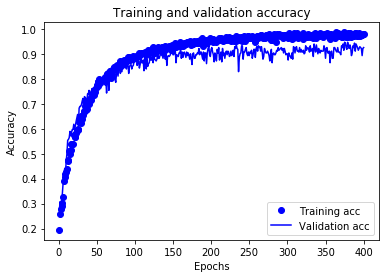

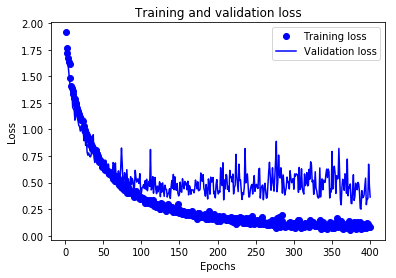

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [7]:
from tensorflow.python.keras.models import load_model

best_model = load_model('IndusNet_7_classes_100_100_1st Experiment.h5')

In [8]:
from tensorflow.python.keras.models import load_model

steps_test=int(number_of_test_samples/batch_size)
result = best_model.evaluate_generator(test_generator, steps=steps_test,verbose=1)
print("Test-set accuracy: {0:.2%}".format(result[1]))

35/35 [==============================] - 6s 169ms/step - loss: 0.5791 - categorical_accuracy: 0.9161
Test-set accuracy: 91.61%


In [9]:
# Preparing test data
import glob
from pathlib import Path
from tensorflow.python.keras.utils import to_categorical
import cv2

apple_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\apple')
banana_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\banana')
orange_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\orange')
watermelon_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\watermelon')
mango_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\mango')
grape_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\grape')
strawberry_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\strawberry')

apple_cases = apple_cases_dir.glob('*.jpg')
banana_cases = banana_cases_dir.glob('*.jpg')
orange_cases = orange_cases_dir.glob('*.jpg')
watermelon_cases = watermelon_cases_dir.glob('*.jpg')
mango_cases = mango_cases_dir.glob('*.jpg')
grape_cases = grape_cases_dir.glob('*.jpg')
strawberry_cases = strawberry_cases_dir.glob('*.jpg')

test_data = []
test_labels = []

for img in apple_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [0]
    test_data.append(img)
    test_labels.append(label)

for img in banana_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [1]
    test_data.append(img)
    test_labels.append(label)

for img in grape_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [2]
    test_data.append(img)
    test_labels.append(label)
    
for img in mango_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [3]
    test_data.append(img)
    test_labels.append(label)

for img in orange_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [4]
    test_data.append(img)
    test_labels.append(label)

for img in strawberry_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [5]
    test_data.append(img)
    test_labels.append(label)

for img in watermelon_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [6]
    test_data.append(img)
    test_labels.append(label)

test_data = np.array(test_data)
test_labels = np.array(test_labels)
test_labels_one_hot_encoding=to_categorical(test_labels)

print("Total number of test examples: ", test_data.shape)
print("Total number of labels:", test_labels.shape)

Total number of test examples:  (560, 100, 100, 3)
Total number of labels: (560, 1)


In [10]:
# Evaluation on test dataset

test_loss, test_score = best_model.evaluate(test_data, test_labels_one_hot_encoding, batch_size=8)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

560/560 [==============================] - 10s 18ms/sample - loss: 0.5791 - categorical_accuracy: 0.9161
Loss on test set:  0.5790533946694008
Accuracy on test set:  0.9160714


In [11]:
# Get predictions
preds = best_model.predict(test_data, batch_size=16,verbose=1)
preds=np.around(preds)
orig_test_labels=test_labels
predicted_labels=np.argmax(preds,axis=1)
predicted_labels=np.reshape(predicted_labels,(560,1))
print(predicted_labels.shape)
print(orig_test_labels.shape)

560/560 [==============================] - 7s 12ms/sample
(560, 1)
(560, 1)


<Figure size 432x288 with 0 Axes>

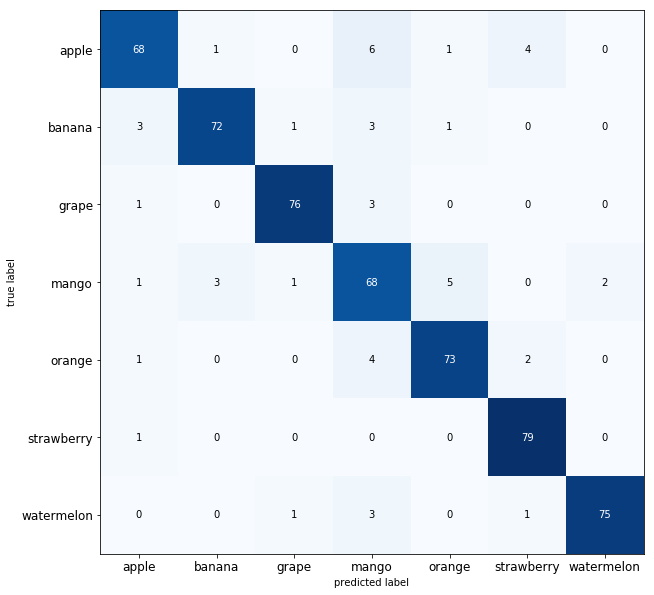

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
# Get the confusion matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm  = confusion_matrix(orig_test_labels, predicted_labels)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,10), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(7), ['apple', 'banana','grape','mango','orange','strawberry','watermelon'], fontsize=12)
plt.yticks(range(7), ['apple', 'banana','grape','mango','orange','strawberry','watermelon'], fontsize=12)
plt.show()